In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COST_COL = 'COST (£) charged to Wellcome (inc VAT when charged)'

In [58]:
DATA_FILE = 'WELLCOME_APCspend2013_forThinkful.csv'
df = pd.read_csv(
    DATA_FILE,
#     usecols=COLS_WITH_NEEDED_DATA,
    low_memory=False,
    encoding="ISO-8859-1"
)
df

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


# 1. Five most common journals, total articles for each

## Known issue I'm overlooking:
- The columns PMID/PMCID sometimes has strings like `PMID: ` or `PMC` or `\n` in them. 
- There are many "near misses" in terms of Journal names, which some NLP might more efficiently handle
- I assume all cash values are formated as a numeric with or without a currency sign in front, and throw out anything not fitting that.

### *Remove rows missing values*

In [86]:
df = df.dropna(subset=['PMID/PMCID', COST_COL])

### *Normalize Journal Case (some are inconsistent)*

In [158]:
df['Journal title'] = df['Journal title'].apply(lambda s: str(s).lower())
df.groupby('Journal title').agg('count').sort_values(by=['PMID/PMCID'], ascending=False).head(5)

,PMID/PMCID,Publisher,Article title,COST (£) charged to Wellcome (inc VAT when charged),cost_1,cost_2,cleaned_cost
Journal title,,,,,,,
plos one,188,188,188,188,188,188,180
journal of biological chemistry,52,52,52,52,52,52,51
neuroimage,28,28,28,28,28,28,28
plos genetics,23,23,23,23,23,23,22
nucleic acids research,22,22,22,22,22,22,22


# 2. Mean, median, and std of the OA cost/article for each journal.

### *Remove '£', drop NaNs, convert strings to floats*

In [143]:
df['cost_1'] = df[COST_COL].str.split('£', expand=True)[1]
df = df.dropna(subset=['cost_1'])
df['cost_2'] = df['cost_1'].apply(lambda s: float(s))

### *Remove outlier costs, which are likely due to data entry error*

In [145]:
df['cleaned_cost'] = df['cost_2'][df['cost_2'] < 25000]

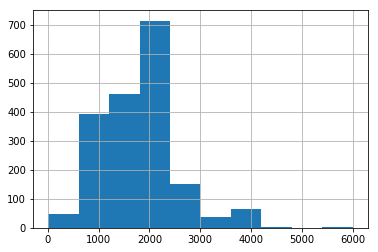

In [146]:
df['cleaned_cost'].hist()

In [152]:
costs = df['cleaned_cost']
print(f'Mean: {costs.mean()}\nMedian: {costs.median()}\nStd: {costs.std()}')

Mean: 1821.109978643887
Median: 1836.92
Std: 762.0314794967572


## QUESTION: What's the best way to do this via df.group.agg?

# For a real bonus round, identify the open access prices paid by subject area.